# Titanic Surviver Predictor

## importing libraries 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## importing data

In [15]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [16]:
print(train.shape,test.shape)

(891, 12) (418, 11)


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Deleting nonrequired column 'Cabin'

In [18]:
train.drop(columns =['Cabin'], inplace =True)
test.drop(columns =['Cabin'], inplace =True)


## filling missing values in embarked 

In [19]:
train['Embarked'].fillna('S', inplace =True)

## filling missing values in Fare 

In [20]:
test['Fare'].fillna(test['Fare'].mean(), inplace =True)

In [21]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

## Dealing with the missing values in age column 

In [26]:
m=train['Age'].mean()
n=train['Age'].std()
gen_age =np.random.randint(m-n,m+n, size =177)

In [29]:
train['Age'][np.isnan(train['Age'])]=gen_age

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
o=test['Age'].mean()
p=test['Age'].std()
gen =np.random.randint(o-p,o+p, size =86)

In [32]:
gen

array([39, 39, 30, 42, 29, 21, 32, 25, 18, 38, 25, 43, 36, 19, 38, 34, 41,
       30, 40, 28, 22, 21, 36, 20, 16, 24, 23, 28, 36, 24, 16, 35, 35, 42,
       32, 28, 30, 34, 16, 42, 34, 31, 17, 32, 20, 38, 18, 38, 19, 17, 41,
       29, 32, 21, 26, 35, 40, 19, 30, 30, 37, 30, 24, 25, 31, 42, 31, 41,
       27, 32, 24, 37, 22, 18, 34, 38, 29, 33, 24, 25, 25, 27, 37, 25, 36,
       26])

In [33]:
test['Age'][np.isnan(test['Age'])]=gen

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## finding correlations with Survived 

In [35]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.019976,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.046082,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.326748,0.083081,0.018443,-0.549500
Age,0.019976,-0.046082,-0.326748,1.000000,-0.231064,-0.171929,0.082994
SibSp,-0.057527,-0.035322,0.083081,-0.231064,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.171929,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.082994,0.159651,0.216225,1.000000


In [38]:
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [39]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [40]:
train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


C:\Users\Sritiman Adak\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


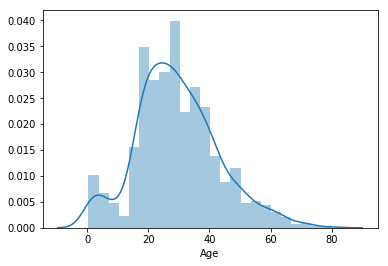

In [41]:
sns.distplot(train['Age'])

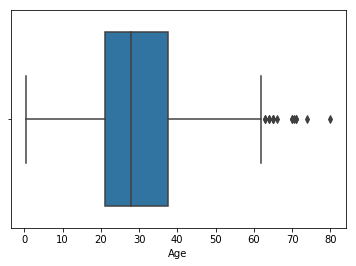

In [42]:
sns.boxplot(train['Age'])

In [50]:
train[train['Age']>65]['Survived'].value_counts()

0    7
1    1
Name: Survived, dtype: int64

C:\Users\Sritiman Adak\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sritiman Adak\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


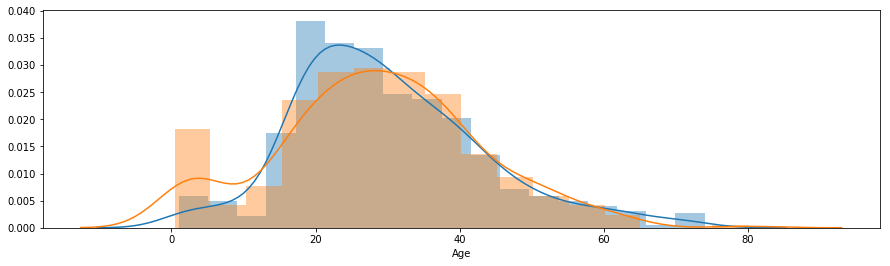

In [54]:
plt.subplots(figsize=(15,4))
sns.distplot(train[train['Survived']==0]['Age'])
sns.distplot(train[train['Survived']==1]['Age'])

In [56]:
passengerID = test['PassengerId'].values

In [58]:
passengerID

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

## dropping the Passengerid and ticket column from the train and test dataset since they are not correlated with Survived 

In [59]:
train.drop(columns=['PassengerId','Ticket'], inplace = True)

In [60]:
test.drop(columns=['PassengerId','Ticket'], inplace = True)

In [61]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,19.0,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


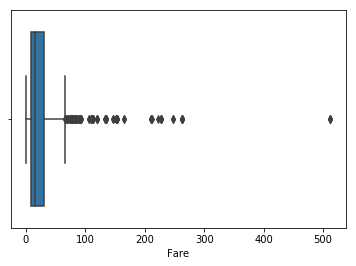

In [63]:
sns.boxplot(train['Fare'])

In [68]:
train[train['Fare']<10]['Survived'].value_counts()

0    269
1     67
Name: Survived, dtype: int64

## we see a trend that as the fare increases the rate of survival increases.So we decide to keep fare 

C:\Users\Sritiman Adak\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sritiman Adak\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


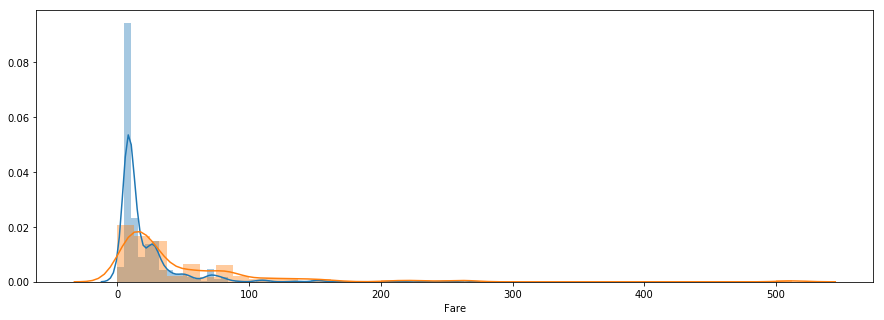

In [73]:
plt.subplots(figsize =(15,5))
sns.distplot(train[train['Survived']==0]["Fare"])
sns.distplot(train[train['Survived']==1]["Fare"])

## For our simplicity we are dropping name 

In [75]:

train.drop(columns=['Name'], inplace =True)
test.drop(columns=['Name'], inplace =True)

In [77]:
train['family']= train['SibSp'] + train['Parch']+ 1

In [79]:
test['family']= test['SibSp'] + test['Parch']+ 1

In [80]:
train.drop(columns =['Parch', 'SibSp'], inplace =True)
test.drop(columns =['Parch', 'SibSp'], inplace =True)

In [81]:
test

,Pclass,Sex,Age,Fare,Embarked,family
0,3,male,34.5,7.8292,Q,1
1,3,female,47.0,7.0000,S,2
2,2,male,62.0,9.6875,Q,1
3,3,male,27.0,8.6625,S,1
4,3,female,22.0,12.2875,S,3
5,3,male,14.0,9.2250,S,1
6,3,female,30.0,7.6292,Q,1
7,2,male,26.0,29.0000,S,3
8,3,female,18.0,7.2292,C,1
9,3,male,21.0,24.1500,S,3


In [83]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

## from the below chart we can see that having 2-4 family members has a considerably higher probability of survival than having 1 or more than 4 members  

In [86]:
train[['family','Survived']].groupby('family').mean()

,Survived
family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


## we are adding a new column family_size in train and test dataframes which will have 3 categories:

## 1 family member: alone
## 2-4 family member:small
## >4 family member: large

In [87]:
def familysize(number):
    if number==1:
        return 'alone'
    elif number>1 and number<5:
        return 'small'
    else:
        return 'large'

In [88]:
familysize(5)

'large'

In [90]:
train['family_size']=train['family'].apply(familysize)

In [91]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family,family_size
0,0,3,male,22.0,7.2500,S,2,small
1,1,1,female,38.0,71.2833,C,2,small
2,1,3,female,26.0,7.9250,S,1,alone
3,1,1,female,35.0,53.1000,S,2,small
4,0,3,male,35.0,8.0500,S,1,alone


In [92]:
test['family_size']=test['family'].apply(familysize)

In [93]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,family,family_size
0,3,male,34.5,7.8292,Q,1,alone
1,3,female,47.0,7.0000,S,2,small
2,2,male,62.0,9.6875,Q,1,alone
3,3,male,27.0,8.6625,S,1,alone
4,3,female,22.0,12.2875,S,3,small


##  Drop family since no more required 

In [94]:
train.drop(columns = ['family'], inplace =True)
test.drop(columns = ['family'], inplace = True)

In [95]:
train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,small
1,1,1,female,38.0,71.2833,C,small


## Extracting the labels for the training dataset 

In [97]:
y = train['Survived'].values
y



array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [98]:
train.drop(columns = ['Survived'], inplace =True)

In [99]:
train.shape

(891, 6)

In [100]:
test.shape

(418, 6)

## Append the train and test data frame to apply the data preprocessing on both simultaneously

In [107]:
final =train.append(test)

In [108]:
final.shape

(1309, 6)

## LabelEncoding and OneHotEncoding done together on the non numeric categorical columns: Pclass, Embarked and family_size 

In [110]:
final =pd.get_dummies(final, columns =['Pclass','Sex','Embarked','family_size'], drop_first=True)

## So finally we get the completely numeric DataFrame 

In [112]:
final.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_large,family_size_small
0,22.0,7.2500,0,1,1,0,1,0,1
1,38.0,71.2833,0,0,0,0,0,0,1
2,26.0,7.9250,0,1,0,0,1,0,0
3,35.0,53.1000,0,0,0,0,1,0,1
4,35.0,8.0500,0,1,1,0,1,0,0


## Extracting the previously appended test dataset values and train dataset values in Xf and X respectively as multidimentional numpy arrays

In [117]:
Xf = final.tail(418).values

## Feature Selection 

In [119]:
X=final.head(891).values

In [120]:
y.shape

(891,)

In [121]:
X.shape

(891, 9)

In [122]:
from sklearn.model_selection import train_test_split

## Dividing the features and label into training and testing data

In [176]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =.15)

In [177]:
X_train.shape

(757, 9)

## here we will use the descision tree classifier to train our model.
## our criterion for learning process wil be entropy, with a maximum tree depth of 4 .

In [178]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
clf =DecisionTreeClassifier(criterion ='entropy',splitter ='random', max_depth =4)

In [182]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [183]:
clf.score(X_test,y_test)

0.8432835820895522

In [184]:
y_pred = clf.predict(X_test)

In [185]:
from sklearn.metrics import accuracy_score

In [186]:
accuracy_score(y_pred,y_test)

0.8432835820895522

## The accuracy of our model turned out to be 0.843,(84.3%) which is quite impressive.

## Further predictions done for completely new dataset, Xf 

In [187]:
yf = clf.predict(Xf)

In [188]:
yf.shape

(418,)

In [189]:
submission = pd.DataFrame()

In [190]:
submission['PassengerId']=passengerID

In [191]:
submission['Survived']= yf

In [192]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [193]:
submission.to_csv('submission.csv', index =False)